In [1]:
# Import Libraries

# Basic Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")
%matplotlib inline


In [2]:
# Loading Dataset
# Load the CSV file (replace with your path)
df = pd.read_csv("../data/sales_data_sample.csv")

# Show first 5 rows
df.head(5)


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai Small,NaN
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100 France EMEA Henriot Paul Small,NaN,NaN,NaN,NaN,NaN
2,10168,36,96.66,1,3479.76,10/28/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,NaN,Burlingame,CA,94217,USA,NaN,Hirano,Juri,Medium
3,10180,29,86.13,9,2497.77,11/11/2003 0:00,Shipped,4,11,2003,Motorcycles,95,S10_1678,Daedalus Designs Imports,20.16.1555,"184, chausse de Tournai",NaN,Lille,NaN,59000,France,EMEA,Rance,Martine,Small
4,10188,48,100.00,1,5512.32,11/18/2003 0:00,Shipped,4,11,2003,Motorcycles,95,S10_1678,Herkku Gifts,+47 2267 3215,"Drammen 121, PR 744 Sentrum",NaN,Bergen,NaN,N 5804,Norway,EMEA,Oeztan,Veysel,Medium


In [4]:
# Check info and missing values
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [17]:
# Data Cleaning & Preparation
# Convert 'OrderDate' to datetime
df['OrderDate'] = pd.to_datetime(df['ORDERDATE'])

# Remove leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# Ensure Sales is numeric
df['SALES'] = pd.to_numeric(df['SALES'], errors='coerce')

# Quick check
df[['ORDERNUMBER','SALES','OrderDate','PRODUCTLINE','COUNTRY']].head()


,ORDERNUMBER,SALES,OrderDate,PRODUCTLINE,COUNTRY
0,10107,2871.00,2003-02-24,Motorcycles,USA
1,10121,2765.90,2003-05-07,Motorcycles,France
2,10134,3884.34,2003-07-01,Motorcycles,France
3,10145,3746.70,2003-08-25,Motorcycles,USA
4,10159,5205.27,2003-10-10,Motorcycles,USA


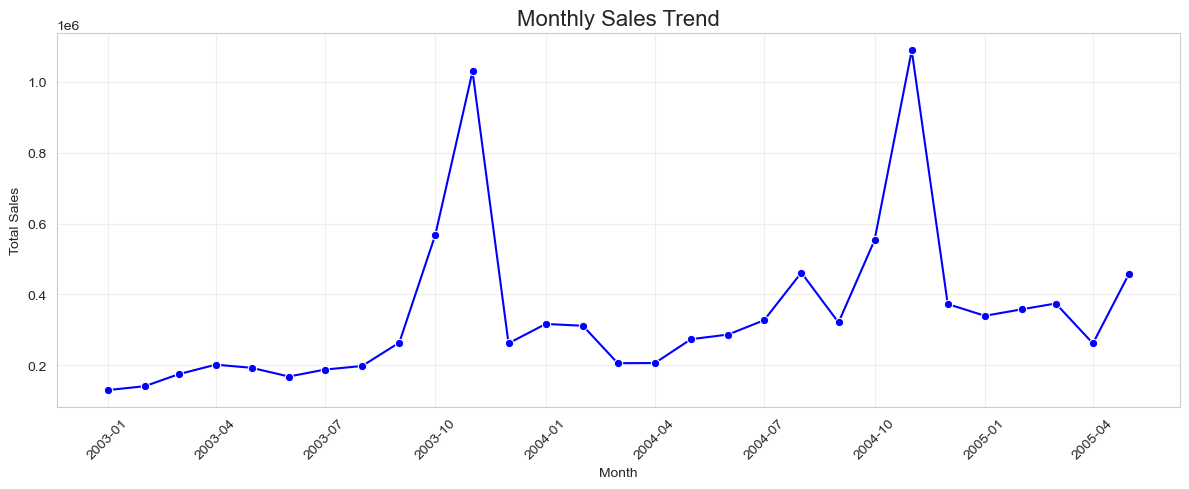

In [18]:
# Monthly Sales Trend (Line Chart)
# Group by month
monthly_sales = df.groupby(df['OrderDate'].dt.to_period('M'))['SALES'].sum().reset_index()
monthly_sales['OrderDate'] = monthly_sales['OrderDate'].dt.to_timestamp()

# Plot
plt.figure(figsize=(12,5))
sns.lineplot(x='OrderDate', y='SALES', data=monthly_sales, marker='o', color='blue')
plt.title("Monthly Sales Trend", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\Basant Khanal\AppData\Local\Temp\ipykernel_20360\182879479.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PRODUCTLINE', y='SALES', data=category_sales, palette='coolwarm')


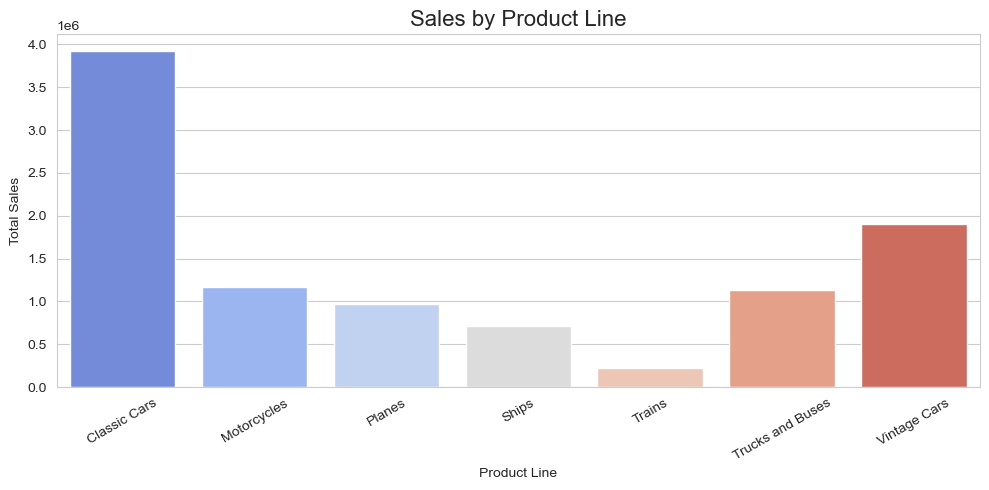

In [19]:
# Total sales by product line
category_sales = df.groupby('PRODUCTLINE')['SALES'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='PRODUCTLINE', y='SALES', data=category_sales, palette='coolwarm')
plt.title("Sales by Product Line", fontsize=16)
plt.xlabel("Product Line")
plt.ylabel("Total Sales")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


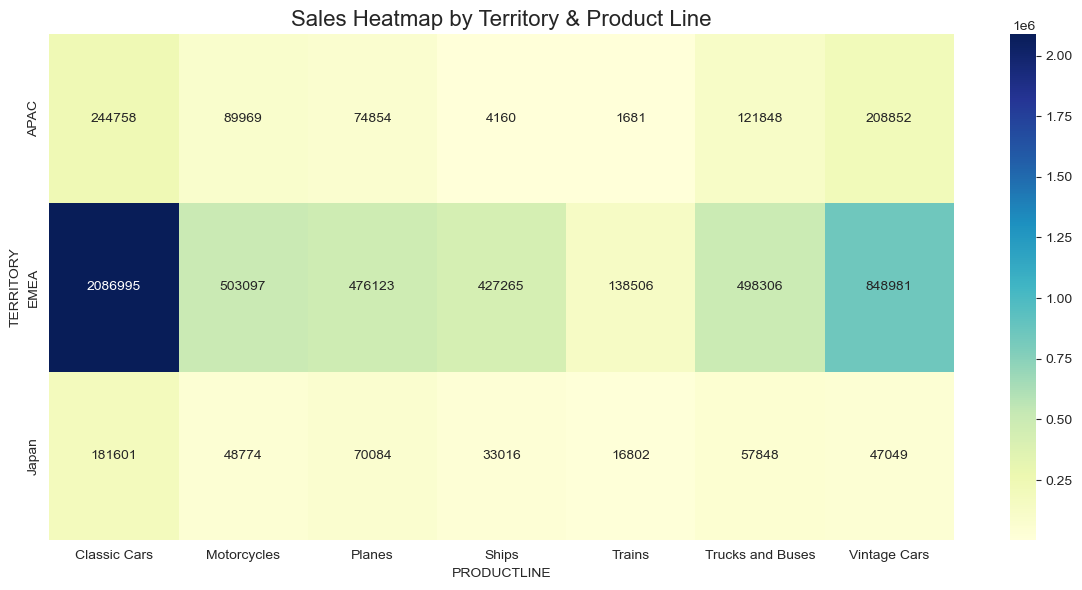

In [20]:
# Regional Sales Heatmap
# Pivot table: Region vs ProductLine
region_category_sales = df.pivot_table(values='SALES', index='TERRITORY', columns='PRODUCTLINE', aggfunc='sum')

plt.figure(figsize=(12,6))
sns.heatmap(region_category_sales, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Sales Heatmap by Territory & Product Line", fontsize=16)
plt.tight_layout()
plt.show()



In [22]:
# Insights and Summary Stats
# Top Product Line
top_product = category_sales.loc[category_sales['SALES'].idxmax()]
print(f"Top Product Line: {top_product['PRODUCTLINE']} with ${top_product['SALES']:.2f} ")

# Top Territory
territory_sales = df.groupby('TERRITORY')['SALES'].sum().reset_index()
top_territory = territory_sales.loc[territory_sales['SALES'].idxmax()]
print(f"Top Territory: {top_territory['TERRITORY']} with ${top_territory['SALES']:.2f} ")

# Peak Month
peak_month = monthly_sales.loc[monthly_sales['SALES'].idxmax()]
print(f"Peak Month: {peak_month['OrderDate'].strftime('%B %Y')} with ${peak_month['SALES']:.2f} ")
# Average Sales
avg_sales = df['SALES'].mean()
print(f"Average Sales per Order: ${avg_sales:.2f}")


Top Product Line: Classic Cars with $3919615.66 
Top Territory: EMEA with $4979272.41 
Peak Month: November 2004 with $1089048.01 
Average Sales per Order: $3553.89


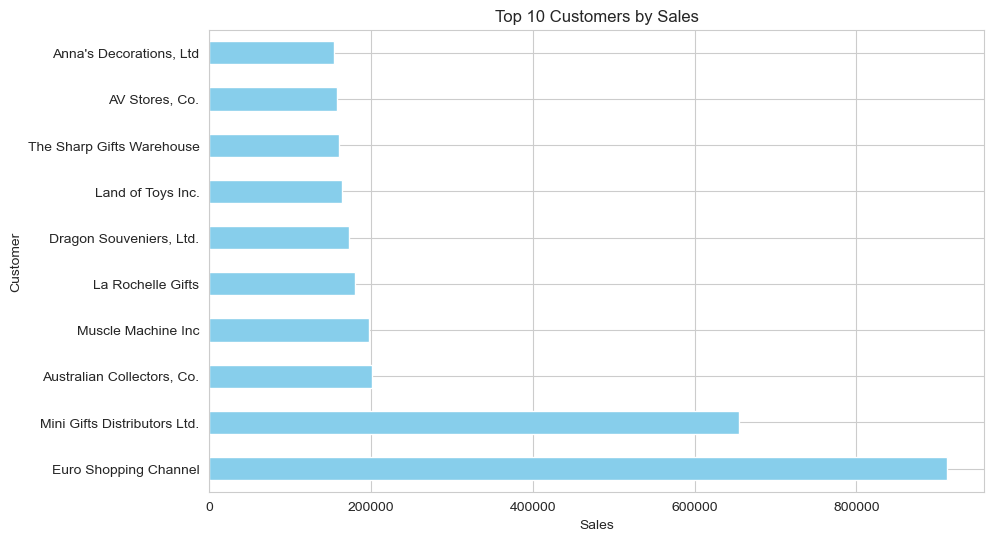

In [28]:
# Top Customers by Sales
top_customers = df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title("Top 10 Customers by Sales")
plt.xlabel("Sales")
plt.ylabel("Customer")
plt.show()


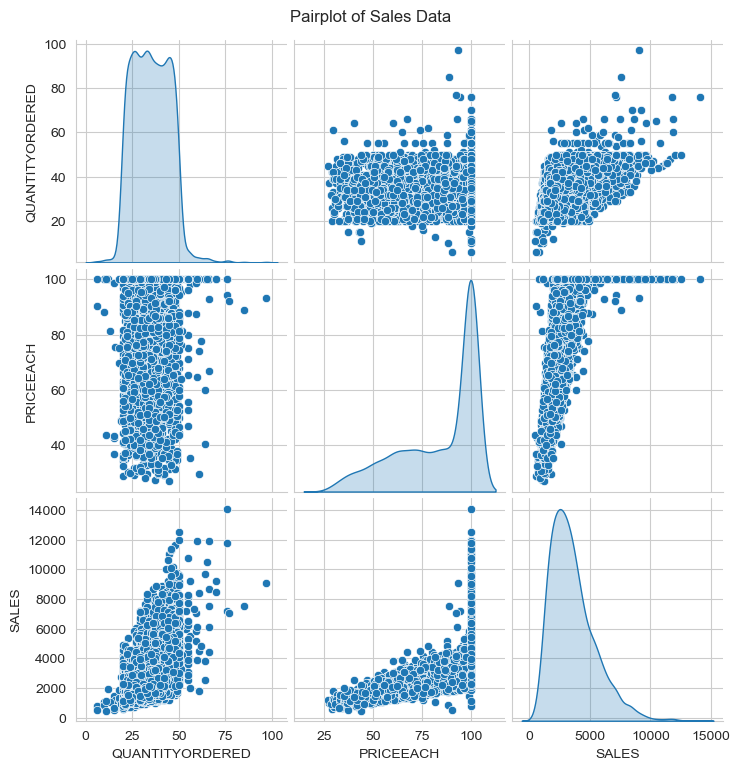

In [24]:
# Interactive Plot with Seaborn Pairplot
# Pairplot to see correlation between numerical features
sns.pairplot(df[['QUANTITYORDERED','PRICEEACH','SALES']], kind='scatter', diag_kind='kde')
plt.suptitle("Pairplot of Sales Data", y=1.02)
plt.show()


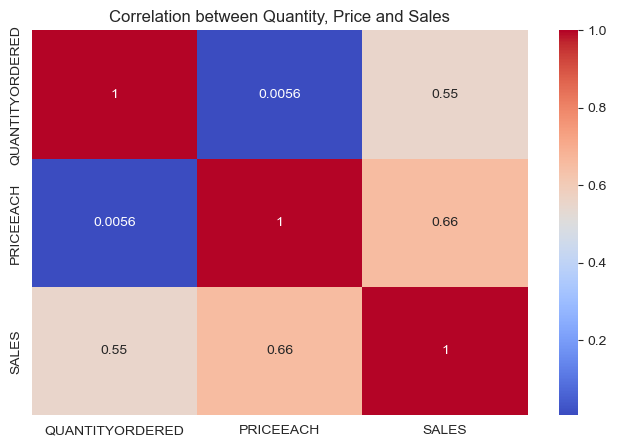

In [25]:
# Correlation Heatmap
numeric_cols = ['QUANTITYORDERED','PRICEEACH','SALES']
plt.figure(figsize=(8,5))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Quantity, Price and Sales")
plt.show()


C:\Users\Basant Khanal\AppData\Local\Temp\ipykernel_20360\1637362033.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='PRODUCTLINE', y='SALES', palette='Set3')


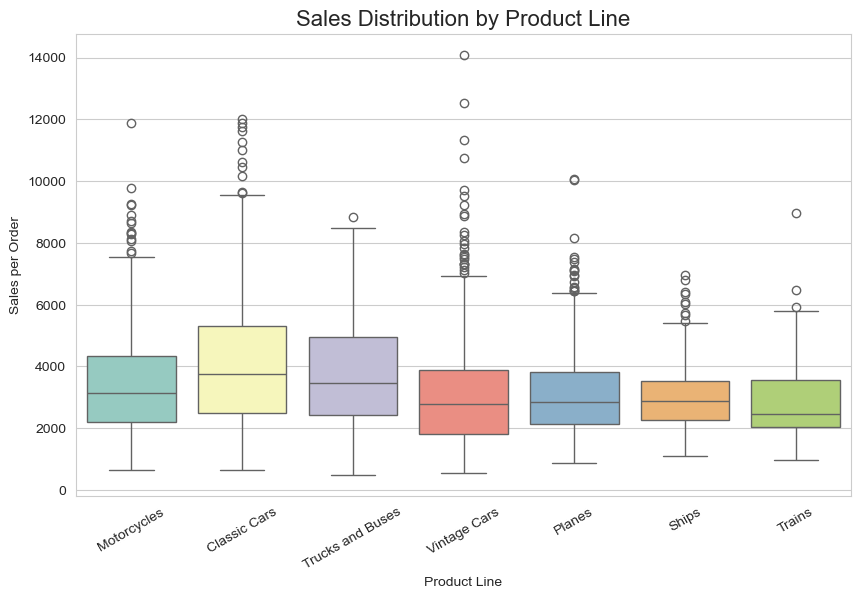

In [31]:
# Boxplot – Distribution of Sales per Product Line
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='PRODUCTLINE', y='SALES', palette='Set3')
plt.title("Sales Distribution by Product Line", fontsize=16)
plt.xlabel("Product Line")
plt.ylabel("Sales per Order")
plt.xticks(rotation=30)
plt.show()


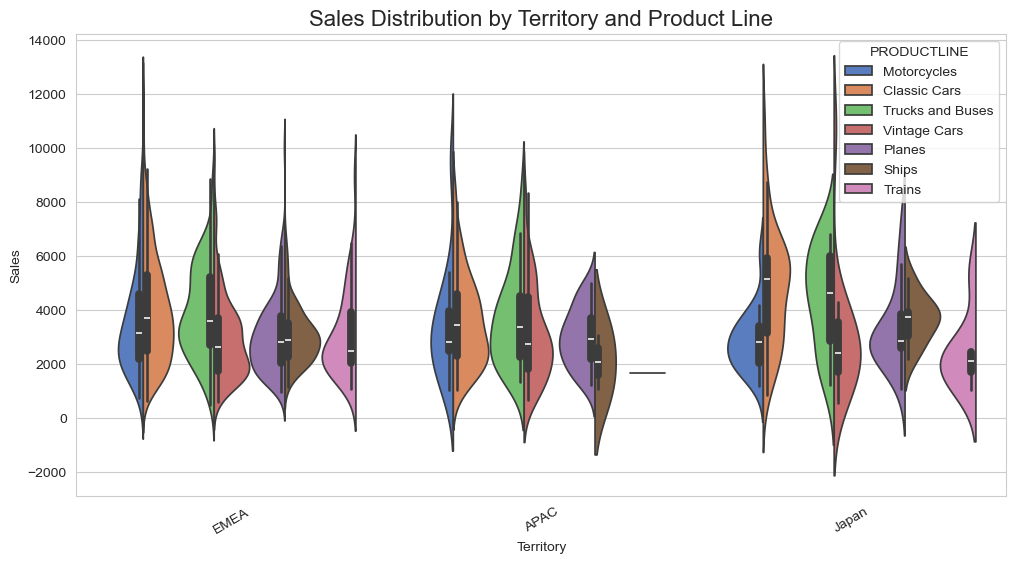

In [32]:
# Violin Plot – Sales per Territory
plt.figure(figsize=(12,6))
sns.violinplot(data=df, x='TERRITORY', y='SALES', hue='PRODUCTLINE', split=True, palette='muted')
plt.title("Sales Distribution by Territory and Product Line", fontsize=16)
plt.xlabel("Territory")
plt.ylabel("Sales")
plt.xticks(rotation=30)
plt.show()


d:\Anaconda\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Anaconda\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 16.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Anaconda\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Anaconda\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


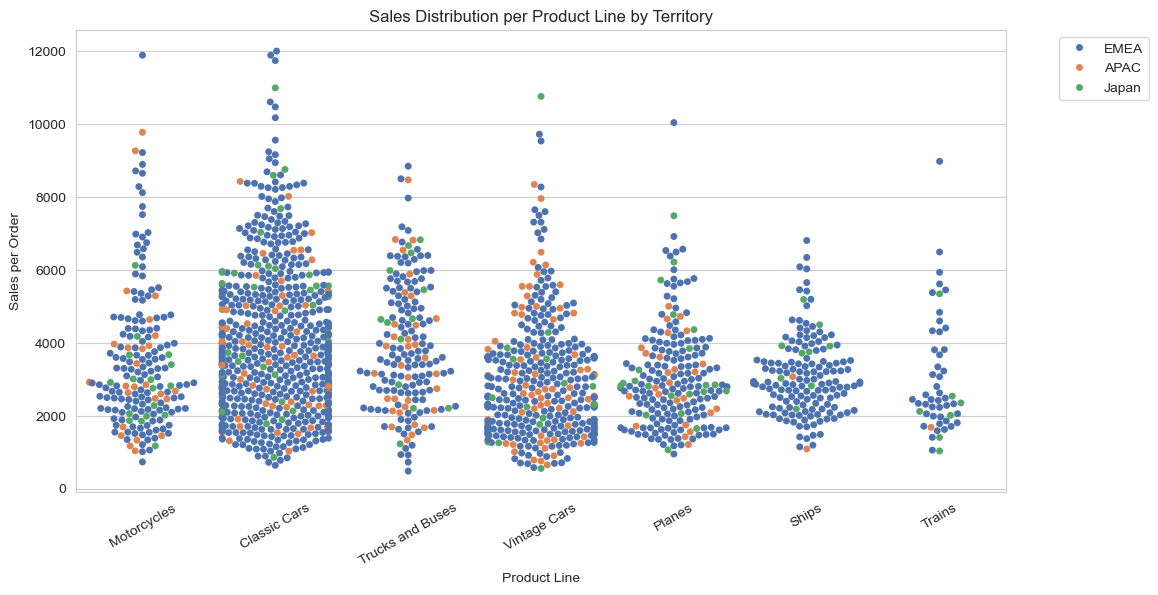

In [33]:
# Swarmplot – Detailed Distribution
plt.figure(figsize=(12,6))
sns.swarmplot(data=df, x='PRODUCTLINE', y='SALES', hue='TERRITORY', palette='deep')
plt.title("Sales Distribution per Product Line by Territory")
plt.xlabel("Product Line")
plt.ylabel("Sales per Order")
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
